In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Final Prediction')

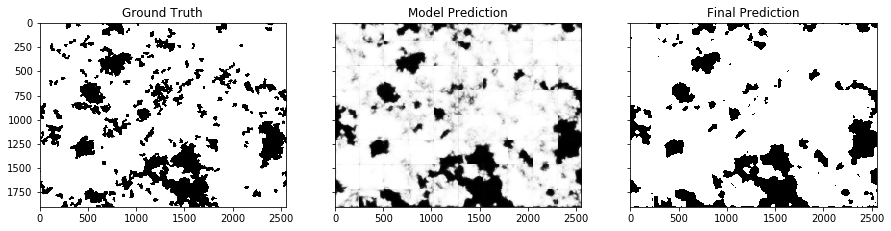

In [3]:
pred = 'path to model predictions/Hela_pos0_00059.png'
orig = 'path to actual annotations/Hela_pos0_00059.png'

img_pred_mask = cv2.imread(pred, cv2.IMREAD_GRAYSCALE)
img_orig = cv2.imread(orig, cv2.IMREAD_GRAYSCALE)

blur = cv2.GaussianBlur(img_pred_mask, (15, 15), 0)

smooth = cv2.addWeighted(blur, 1.5, img_pred_mask, -0.5, 0)

intensity_max = np.amax(smooth)
threshold = int(0.5*intensity_max)
ret, img_thres = cv2.threshold(smooth, threshold, intensity_max, cv2.THRESH_BINARY)
img_thres[np.where(img_thres >= 127)] = 255
img_thres[np.where(img_thres < 127)] = 0

fig, axs = plt.subplots(1, 3, figsize=(15, 15), sharey=True)
axs[0].imshow(img_orig, cmap='gray')
axs[0].set_title('Ground Truth')
axs[1].imshow(img_pred_mask, cmap='gray')
axs[1].set_title('Model Prediction')
axs[2].imshow(img_thres, cmap='gray')
axs[2].set_title('Final Prediction')

In [5]:
true_cells_idx = np.where(img_orig == 255)
true_cells_idx = list(zip(true_cells_idx[0], true_cells_idx[1]))
mask_cells_idx = np.where(img_thres == 255)
mask_cells_idx = list(zip(mask_cells_idx[0], mask_cells_idx[1]))

x = img_orig.shape[0]
y = img_orig.shape[1]

TP = list(set(true_cells_idx).intersection(mask_cells_idx))
TN = (x * y) - (len(mask_cells_idx) + len(true_cells_idx) - len(TP))
precision = len(TP) / (len(mask_cells_idx))
recall = len(TP) / (len(true_cells_idx))
f1 = (2 * precision * recall) / (precision + recall)

area_orig = cv2.countNonZero(img_orig) / (x * y)
area_pred = cv2.countNonZero(img_pred_mask) / (x * y)

print("Precision ", precision, " Recall ",  recall, " F1 ", f1)
print("Area orig ", area_orig, " pred ", area_pred)

Precision  0.9040059117233888  Recall  0.9492327353076115  F1  0.9260674610840762
Area orig  0.802343194331024  pred  0.9826540726008272
